In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [165]:
import sys 
sys.path.append('/kaggle/input/emailj/emails.csv')

In [166]:
data = pd.read_csv("/kaggle/input/emailj/emails.csv")
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [167]:
data.shape

(5728, 2)

In [168]:
data['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [169]:
data['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

<Axes: ylabel='count'>

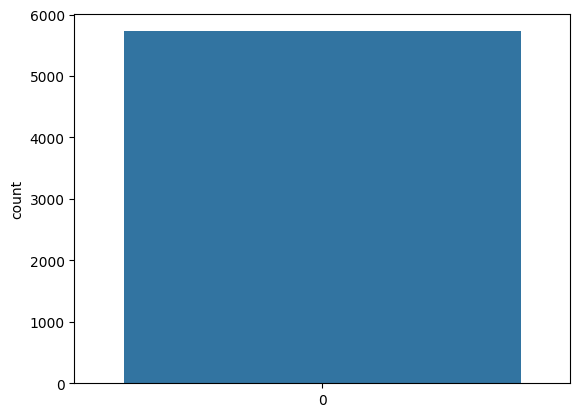

In [170]:
sns.countplot(data['spam'])

In [171]:
data.duplicated().sum()

33

In [172]:
data.drop_duplicates(inplace=True)

In [173]:
data.duplicated().sum()

0

In [174]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [175]:
data.shape

(5695, 2)

In [176]:
5728 - 33

5695

<Axes: ylabel='count'>

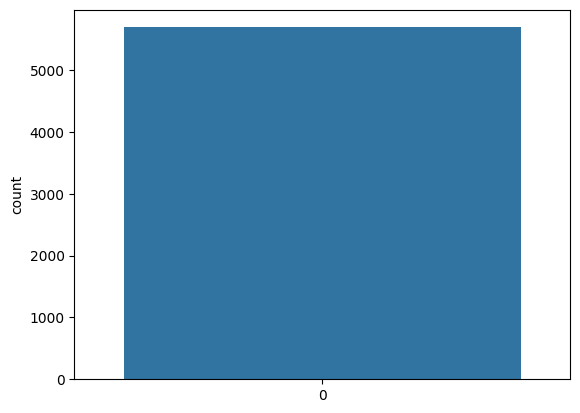

In [177]:
sns.countplot(data['spam'])

In [178]:
data['spam'].value_counts()

spam
0    4327
1    1368
Name: count, dtype: int64

# Separate in X and y:

In [179]:
X = data['text'].values
y = data['spam'].values

In [180]:
y

array([1, 1, 1, ..., 0, 0, 0])

# Train-Test split:

In [181]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state= 42)

In [182]:
print(X_test.shape, y_train.shape, y_test.shape)

(1709,) (3986,) (1709,)


# Pre-processing:

In [183]:
cv = CountVectorizer()
x_train = cv.fit_transform(X_train)

In [184]:
x_train.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [185]:
len(x_train.toarray())

3986

In [186]:
len(x_train.toarray()[0])

31910

# Training by ML Algorithms:

mnb_classifier Training Accuracy: 99.67385850476668
mnb_classifier Testing Accuracy: 99.06377998829726


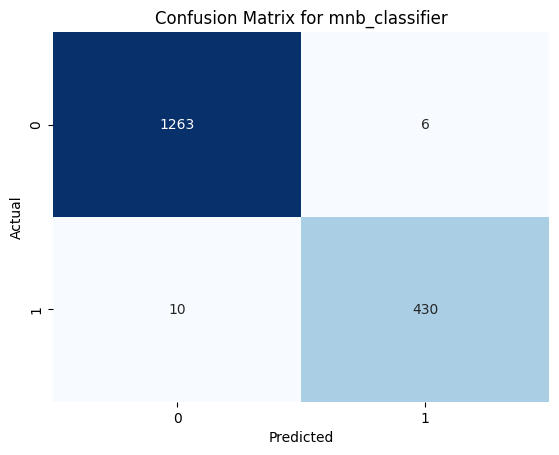

knn_classifier Training Accuracy: 93.45208228800803
knn_classifier Testing Accuracy: 89.5845523698069


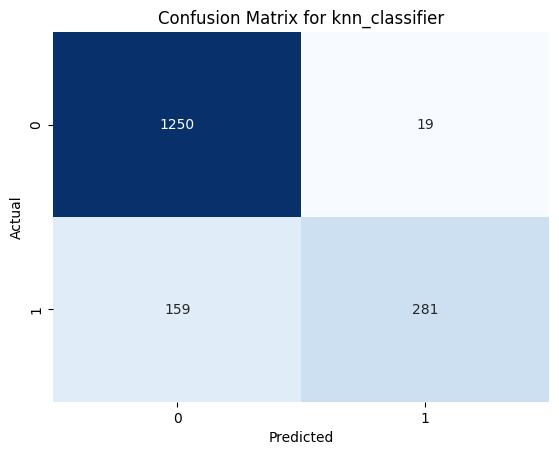

dt_classifier Training Accuracy: 95.98595082789764
dt_classifier Testing Accuracy: 94.79227618490346


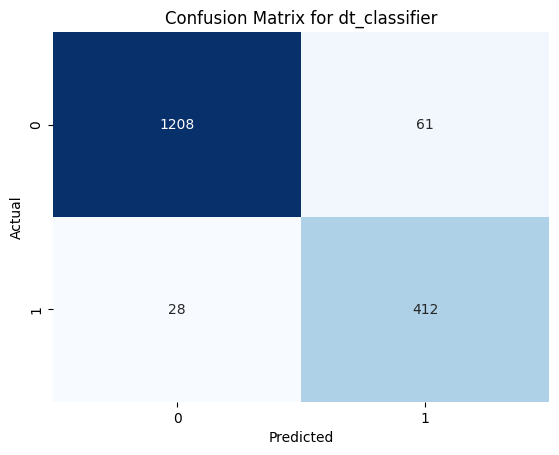

In [187]:
# Initialize the vectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_vectorized = vectorizer.transform(X_test)

# initializing models 
models = { 
    "mnb_classifier" : MultinomialNB(),
    "knn_classifier" : KNeighborsClassifier(),
    "dt_classifier" : DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5)
}

# Loop through the models and evaluate each
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_vectorized, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_vectorized)
    
    # Calculate training accuracy
    y_train_pred = model.predict(X_train_vectorized)  # Predict on training data
    train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculate training accuracy
    
    # Calculate testing accuracy
    test_accuracy = accuracy_score(y_test, y_pred)  # Calculate testing accuracy
    
    # Print accuracies
    print(f"{model_name} Training Accuracy: {train_accuracy*100}")
    print(f"{model_name} Testing Accuracy: {test_accuracy*100}")
    
    # Generate and display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Comparison:

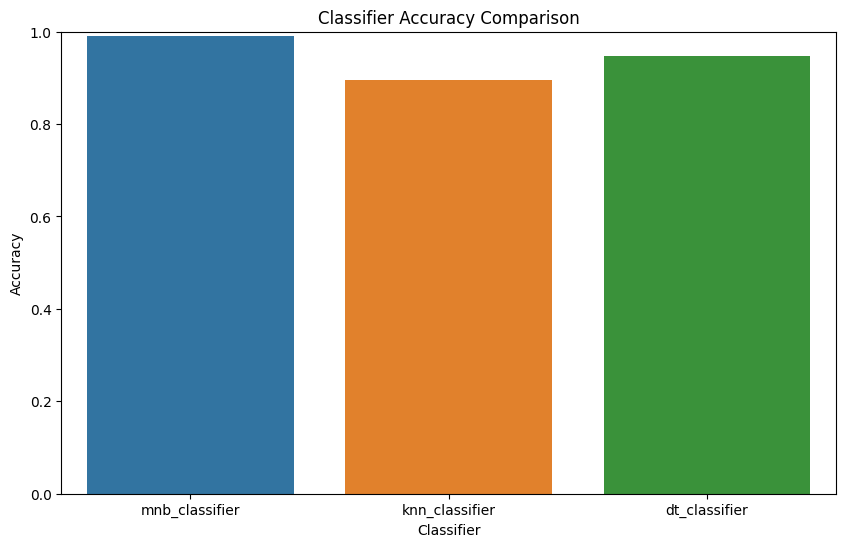

In [188]:
# Store the accuracy results
results = []

# Train and evaluate each classifier
for name, clf in models.items():
    clf.fit(X_train_vectorized, y_train)
    y_pred = clf.predict(X_test_vectorized)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'Classifier': name, 'Accuracy': accuracy})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='Accuracy', data=results_df)
plt.title('Classifier Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.show()

# Possibilities and Prediction:

In [189]:
# Define summaries based on training data
summaries = {
    'spam_prior': 0.6,  
    'ham_prior': 0.4, 
    'spam_likelihood': {
        'congratulations': 0.1,
        'won': 0.05,
      
    },
    'ham_likelihood': {
        'meeting': 0.2,
        'at': 0.1,
       
    }
}

def preprocess_email(email_text):
    #  email preprocessing logic 
    return email_text.lower().split()  

def predict_single_email(email_text, summaries):
    # Preprocess the email text
    processed_email = preprocess_email(email_text)
    
    # Calculate probabilities using the summaries
    prob_spam = summaries['spam_prior']
    prob_ham = summaries['ham_prior']
    
    for word in processed_email:
        if word in summaries['spam_likelihood']:
            prob_spam *= summaries['spam_likelihood'][word]
        if word in summaries['ham_likelihood']:
            prob_ham *= summaries['ham_likelihood'][word]

    # Apply Bayes' theorem
    total_prob = prob_spam + prob_ham
    spam_prob = prob_spam / total_prob
    ham_prob = prob_ham / total_prob
    
    # probabilities to percentages
    spam_prob_percentage = spam_prob * 100
    ham_prob_percentage = ham_prob * 100
    
    # Print the calculated probabilities 
    print(f"P(Spam | email) = {spam_prob_percentage:.2f}%")
    print(f"P(Ham | email) = {ham_prob_percentage:.2f}%")
    
    # Return the predicted class based on probabilities
    return "spam" if spam_prob > ham_prob else "ham"

email_text = "Congratulations! You've won a lottery!"
prediction = predict_single_email(email_text, summaries)
print(f"The email is predicted as: {prediction}")

P(Spam | email) = 6.98%
P(Ham | email) = 93.02%
The email is predicted as: ham
